In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Time Series data ----> Convert date column into datetime dtype

In [4]:
df['Date']= df['Date'].astype('datetime64')
df=df.sort_values(by='Date')

In [5]:
# df['Day']=df['Date'].dt.day
# df['Month']=df['Date'].dt.month
# df['Year']=df['Date'].dt.year

In [6]:
# df.head()

Group by time column<br>
grouper

In [7]:
groups = df.groupby(pd.Grouper(key='Date',freq='6m'))
groups['Open'].mean()

Date
2012-01-31    307.354000
2012-07-31    300.943413
2013-01-31    349.248240
2013-07-31    420.050240
2014-01-31    493.398268
2014-07-31    566.135920
2015-01-31    546.408730
2015-07-31    549.064841
2016-01-31    687.763600
2016-07-31    718.666190
2017-01-31    777.552150
Freq: 6M, Name: Open, dtype: float64

Lonng Short term deeplearning

Sample rate no. of days used to predict next price of stocks.

1 -- 30 days to independent data<br>
31st day will be our dependent data

In [8]:
X=df['Open']
X_train=[]
Y_train=[]
for i in range(60,len(X)):
    X_train.append(X[i-60:i])
    Y_train.append(X[i])
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train.reshape(len(Y_train),1))

How to learn<br>
LSTM --- long short term memory<br>
RNN --- Recurrement Neural Network(Not Used currently) -- Vanishing Gradient <br>


We have to chage shape (3D)<br>
(no. of samples,timesteps,no. of feature)

In [10]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [11]:
import tensorflow as tf

never do split on time series analysis

In [12]:
lstm=tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(units=50,
                              input_shape=(X_train.shape[1],1),
                              return_sequences=True))
lstm.add(tf.keras.layers.LSTM(units=25))
lstm.add(tf.keras.layers.Dense(units=1))
lstm.compile(optimizer='adam',loss='mse')
lstm.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 6s 41ms/step - loss: 0.0379
Epoch 2/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0020
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 4/100
38/38 [==============================] - 1s 23ms/step - loss: 0.0011
Epoch 5/100
38/38 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 6/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0011
Epoch 7/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0010
Epoch 8/100
38/38 [==============================] - 1s 22ms/step - loss: 0.0010
Epoch 9/100
38/38 [==============================] - 1s 20ms/step - loss: 9.9873e-04
Epoch 10/100
38/38 [==============================] - 1s 19ms/step - loss: 9.9852e-04
Epoch 11/100
38/38 [==============================] - 1s 23ms/step - loss: 9.6649e-04
Epoch 12/100
38/38 [==============================] - 1s 25ms/step - loss: 9.8246e-04
Epoch 13/

Our sample is not scaled

38/38 [==============================] - 1s 7ms/step


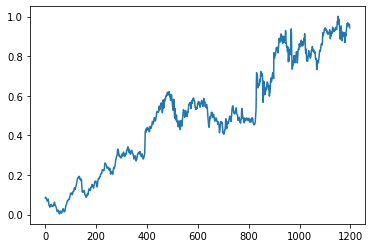

In [13]:
y_pred=lstm.predict(X_train)
from matplotlib import pyplot as plt
plt.plot(y_pred)
plt.show()